In [2]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
from tabs import DihedralsInfo, VisualizeEnsemble

Get a ``mol`` object

In [3]:
IPythonConsole.drawOptions.addAtomIndices = True

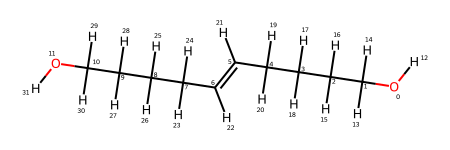

In [16]:
mol = Chem.AddHs(Chem.MolFromSmiles("CCCCC"))
mol = Chem.AddHs(Chem.MolFromSmiles("OCCCCC=CCCCCO"))
mol

First, we build a ``TorsionInfoList`` class object.

By building it with the experimental torsions using ``WithTorsionLibs``, it gets populated with information derived from the Torsion Library.

In [17]:
torInfo = DihedralsInfo.FromTorsionLib(mol)

In [18]:
torInfo.smarts, torInfo.multiplicities, torInfo.torsionTypes, torInfo.indices

(['[$([CX3]([C])([H])):1]=[CX3:2]([H])!@;-[CH2:3][C:4]',
  '[$([CX3]([C])([H])):1]=[CX3:2]([H])!@;-[CH2:3][C:4]',
  '[!#1:1][CX4H2:2]!@;-[CX4H2:3][!#1:4]',
  '[!#1:1][CX4H2:2]!@;-[CX4H2:3][!#1:4]',
  '[!#1:1][CX4H2:2]!@;-[CX4H2:3][!#1:4]',
  '[!#1:1][CX4H2:2]!@;-[CX4H2:3][!#1:4]',
  '[!#1:1][CX4H2:2]!@;-[CX4H2:3][!#1:4]',
  '[!#1:1][CX4H2:2]!@;-[CX4H2:3][!#1:4]',
  '[*:1][X3,X2:2]=[X3,X2:3][*:4]'],
 [3, 3, 3, 3, 3, 3, 3, 3, 2],
 [<TorsionType.REGULAR: 1>,
  <TorsionType.REGULAR: 1>,
  <TorsionType.REGULAR: 1>,
  <TorsionType.REGULAR: 1>,
  <TorsionType.REGULAR: 1>,
  <TorsionType.REGULAR: 1>,
  <TorsionType.REGULAR: 1>,
  <TorsionType.REGULAR: 1>,
  <TorsionType.REGULAR: 1>],
 [[5, 6, 7, 8],
  [6, 5, 4, 3],
  [0, 1, 2, 3],
  [1, 2, 3, 4],
  [2, 3, 4, 5],
  [6, 7, 8, 9],
  [7, 8, 9, 10],
  [8, 9, 10, 11],
  [4, 5, 6, 7]])

In [6]:
torInfo.GetnTABS()

6

In [7]:
torInfo.GetTABS()

ValueError: No conformers found in molecule.

In [10]:
AllChem.EmbedMultipleConfs(mol, randomSeed=42, numConfs=10)

In [11]:
mol.GetNumConformers()

10

In [12]:
test = DihedralsInfo.FromTorsionLib(mol)
ctors = test.GetConformerTorsions()
ctors

array([[1.04722713, 3.14160212],
       [5.23613491, 5.23606681],
       [1.04709894, 1.04751624],
       [3.14164533, 1.04726229],
       [3.14185206, 5.23617251],
       [3.14159502, 3.14155916],
       [3.14153336, 3.14150147],
       [3.14153691, 3.14158632],
       [3.14150088, 1.04727656],
       [1.04672704, 3.14112578]])

In [13]:
torInfo.GetTABS()

[23, 11, 22, 23, 13, 33, 33, 33, 23, 23]

In [14]:
torInfo.GetTABS(ctors)

[23, 11, 22, 23, 13, 33, 33, 33, 23, 23]

In [15]:
VisualizeEnsemble(mol, dihedral=torInfo.indices[0], showTABS=True);

interactive(children=(IntSlider(value=0, description='confId', max=9), Output()), _dom_classes=('widget-intera…